#### Anthony Sargent
#### CS464 Final Project

## Touch Screen Viability and Tactile Feedback in Video Games

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = np.genfromtxt("cs464project_data.csv", delimiter=",", dtype='str');

In [2]:
participant = data[:,0]
control_type = data[:,1]
birth_sex = data[:,2]
age = data[:,3]
handedness = data[:,4]
is_gamer = data[:,5]
completion_time = data[:,6]
error_rate = data[:,7]
rank = data[:,8]

categories = ["Participant", "Control Type", "Birth Sex", "Age", "Handedness", "Gamer", "Completion Time",
             "Error Rate", "Control Rank"]

table = {
    categories[0]: participant,
    categories[1]: control_type,
    categories[2]: birth_sex,
    categories[3]: age,
    categories[4]: handedness,
    categories[5]: is_gamer,
    categories[6]: completion_time,
    categories[7]: error_rate,
    categories[8]: rank,
}

tableDisplay = pd.DataFrame(table)
print(tableDisplay.to_string(index=False))

Participant Control Type Birth Sex Age Handedness Gamer Completion Time Error Rate Control Rank
          1     Keyboard      Male  23      Right   Yes              36          0            5
          1        Touch      Male  23      Right   Yes              90          7            1
          2     Keyboard    Female  24       Left   Yes             240         31            4
          2        Touch    Female  24       Left   Yes              17          0            5
          3     Keyboard      Male  24      Right   Yes              67          0            4
          3        Touch      Male  24      Right   Yes              42          1            3
          4     Keyboard      Male  22       Both   Yes             183          1            5
          4        Touch      Male  22       Both   Yes              83          0            2
          5     Keyboard    Female  35      Right    No             452         11            5
          6     Keyboard    Female  30  

In [3]:
features = data[:,[1,2,3,4,5]]
time = data[:,6]
error = data[:,7]
rank = data[:,8]

features[features=="Male"] = 1
features[features=="Female"] = 0
features[features=="Right"] = 1
features[features=="Left"] = 0
features[features=="Both"] = 2
features[features=="Yes"] = 1
features[features=="No"] = 0
features[features=="Keyboard"] = 0
features[features=="Touch"] = 1

features = np.array(features, dtype="float64")
time = np.array(time, dtype="float64")
error = np.array(error, dtype="float64")
rank = np.array(rank, dtype="float64")

def checkWeight(index, dependent):
    x = features[:, index]        
    x_centered = x - np.mean(x)
    y_centered = dependent - np.mean(dependent)
    return np.abs((x_centered / np.linalg.norm(x_centered)) @ \
    (y_centered / np.linalg.norm(y_centered)))


time_weights = []
for i in range(len(features[0])):
    time_weights.append(checkWeight(i, time))

error_weights = []
for i in range(len(features[0])):
    error_weights.append(checkWeight(i, error))

rank_weights = []
for i in range(len(features[0])):
    rank_weights.append(checkWeight(i, rank))
    
weights = [
    [categories[1], time_weights[0], error_weights[0], rank_weights[0]],
    [categories[2], time_weights[1], error_weights[1], rank_weights[1]],
    [categories[3], time_weights[2], error_weights[2], rank_weights[2]],
    [categories[4], time_weights[3], error_weights[3], rank_weights[3]],
    [categories[5], time_weights[4], error_weights[4], rank_weights[4]],
]
weights_table = pd.DataFrame(weights, columns = ['Feature', 'Time Weight', "Error Weight", "Rank Weight"])
print(weights_table.to_string(index=False))

     Feature  Time Weight  Error Weight  Rank Weight
Control Type     0.301263      0.286975     0.671854
   Birth Sex     0.499107      0.437072     0.201968
         Age     0.621857      0.280708     0.009343
  Handedness     0.145351      0.326064     0.218341
       Gamer     0.405190      0.140265     0.079878


In [4]:
# plt.semilogx()
# plt.scatter(features[0], time_weights, c="blue", alpha=0.5, label="Regular")
# plt.legend()
# plt.show()
key_times = []
key_mistakes = []
key_ranks = []
touch_times = []
touch_mistakes = []
touch_ranks = []

for i in range(len(data)):
    if data[i][1] == "Keyboard":
        key_times.append(data[i][6])
        key_mistakes.append(data[i][7])
        key_ranks.append(data[i][8])
    if data[i][1] == "Touch":
        touch_times.append(data[i][6])
        touch_mistakes.append(data[i][7])
        touch_ranks.append(data[i][8])   
        
key_times = np.array(key_times, dtype="float64")
key_mistakes = np.array(key_mistakes, dtype="float64")
key_ranks = np.array(key_ranks, dtype="float64")
touch_times = np.array(touch_times, dtype="float64")
touch_mistakes = np.array(touch_mistakes, dtype="float64")
touch_ranks = np.array(touch_ranks, dtype="float64")

key_time_avg = np.average(key_times)
key_mist_avg = np.average(key_mistakes)
key_rank_avg = np.average(key_ranks)
touch_time_avg = np.average(touch_times)
touch_mist_avg = np.average(touch_mistakes)
touch_rank_avg = np.average(touch_ranks)

key_time_std = np.std(key_times)
key_mist_std = np.std(key_mistakes)
key_rank_std = np.std(key_ranks)
touch_time_std = np.std(touch_times)
touch_mist_std = np.std(touch_mistakes)
touch_rank_std = np.std(touch_ranks)

avg_data = [
    ["Keyboard", key_time_avg, key_mist_avg, key_rank_avg,],
    ["Touch", touch_time_avg, touch_mist_avg, touch_rank_avg],
]
avg_table = pd.DataFrame(avg_data, columns = ['Control Type', 'Time (seconds)', 'Mistakes',
                                              'Rank'])
print("Overall Average Time")
OAT = np.average(time)
print(OAT)
print("\n")

print("Overall Average Error")
OAE = np.average(error)
print(OAE)
print("\n")

print("Overall Average Rank")
OAR = np.average(rank)
print(OAR)
print("\n")

print("Overall STD Time")
OST = np.std(time)
print(OST)
print("\n")

print("Overall STD Error")
OSE = np.std(error)
print(OSE)
print("\n")

print("Overall STD Rank")
OSR = np.std(rank)
print(OSR)
print("\n")

print("Control Type Averages\n")
print(avg_table.to_string(index=False))
print("\n")

std_data = [
    ["Keyboard", key_time_std, key_mist_std, key_rank_std],
    ["Touch", touch_time_std, touch_mist_std, touch_rank_std],
]
std_table = pd.DataFrame(std_data, columns = ['Control Type', 'Time (seconds)', 'Mistakes', 'Rank'])

print("Control Type Standard Deviations\n")
print(std_table.to_string(index=False))

Overall Average Time
102.6842105263158


Overall Average Error
3.3684210526315788


Overall Average Rank
3.9210526315789473


Overall STD Time
102.5732357784473


Overall STD Error
7.094924251780575


Overall STD Rank
1.3790076322709368


Control Type Averages

Control Type  Time (seconds)  Mistakes     Rank
    Keyboard      132.000000  5.300000 4.800000
       Touch       70.111111  1.222222 2.944444


Control Type Standard Deviations

Control Type  Time (seconds)  Mistakes     Rank
    Keyboard      129.863005  9.143850 0.400000
       Touch       38.176329  2.148787 1.422916


In [5]:
def calcTScore(samp_mean, pop_mean, samp_std, samp_size):
    t = (samp_mean-pop_mean)/(samp_std/np.sqrt(samp_size))
    return t

key_time_t = calcTScore(key_time_avg, OAT, key_time_std, 10)
print("Keyboard + Time T Score: ", key_time_t)
key_mist_t = calcTScore(key_mist_avg, OAE, key_mist_std, 10)
print("Keyboard + Mistakes T Score: ", key_mist_t)
key_rank_t = calcTScore(key_rank_avg, OAR, key_rank_std, 10)
print("Keyboard + Rank T Score: ", key_rank_t)
touch_time_t = np.absolute(calcTScore(touch_time_avg, OST, touch_time_std, 9))
print("Touch + Time T Score: ", touch_time_t)
touch_mist_t = np.absolute(calcTScore(touch_mist_avg, OSE, touch_mist_std, 9))
print("Touch + Mistakes T Score: ", touch_mist_t)
touch_rank_t = np.absolute(calcTScore(touch_rank_avg, OSR, touch_rank_std, 9))
print("Touch + Rank T Score: ", touch_rank_t)

Keyboard + Time T Score:  0.7138650944409776
Keyboard + Mistakes T Score:  0.6680105964047947
Keyboard + Rank T Score:  6.948689069054201
Touch + Time T Score:  2.550962244348228
Touch + Mistakes T Score:  8.19909520153215
Touch + Rank T Score:  3.300482105406593


In [6]:
#Online calculator with T scores above helped me calculate these p values

key_time_p = 0.493407
key_mist_p = 0.520888
key_rank_p = 0.000067
touch_time_p = 0.034124
touch_mist_p = 0.000037
touch_rank_p = 0.010851

p_data = [
    ["Keyboard", key_time_p, key_mist_p, key_rank_p],
    ["Touch", touch_time_p, touch_mist_p, touch_rank_p],
]
p_table = pd.DataFrame(p_data, columns = ['Control Type', 'Time p value', 'Mistakes p value', 'Rank p value'])

print(p_table.to_string(index=False))

Control Type  Time p value  Mistakes p value  Rank p value
    Keyboard      0.493407          0.520888      0.000067
       Touch      0.034124          0.000037      0.010851


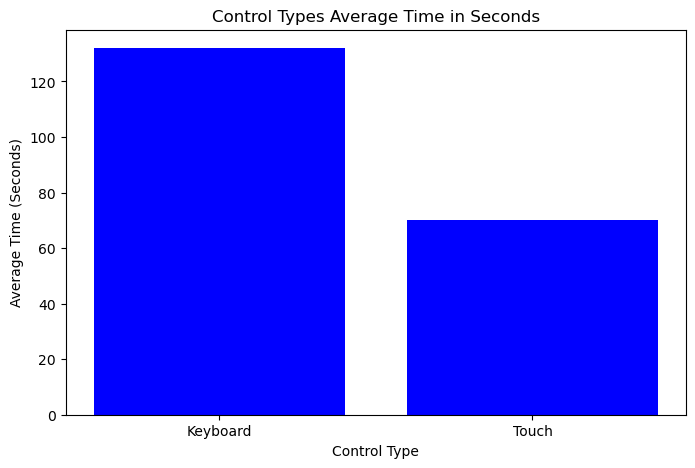

In [7]:
bar_data = {'Keyboard':key_time_avg, 'Touch':touch_time_avg}
control = list(bar_data.keys())
control_time = list(bar_data.values())
  
fig = plt.figure(figsize = (8, 5))

plt.bar(control, control_time, color ='blue', width = 0.8)
 
plt.xlabel("Control Type")
plt.ylabel("Average Time (Seconds)")
plt.title("Control Types Average Time in Seconds")
plt.show()

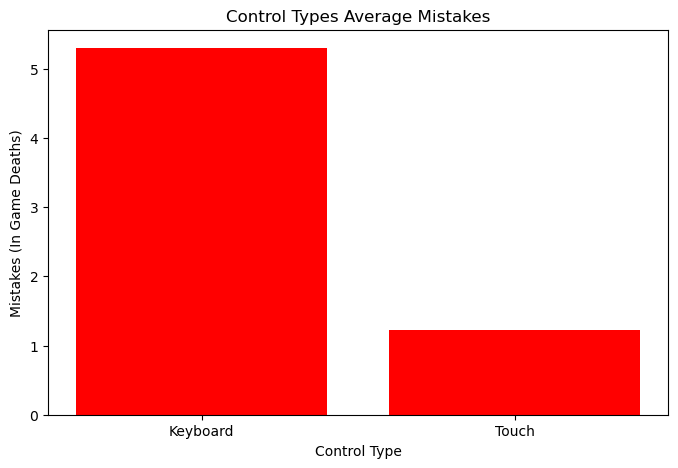

In [8]:
bar_data = {'Keyboard':key_mist_avg, 'Touch':touch_mist_avg}
control = list(bar_data.keys())
control_mist = list(bar_data.values())
  
fig = plt.figure(figsize = (8, 5))

plt.bar(control, control_mist, color ='red', width = 0.8)
 
plt.xlabel("Control Type")
plt.ylabel("Mistakes (In Game Deaths)")
plt.title("Control Types Average Mistakes")
plt.show()

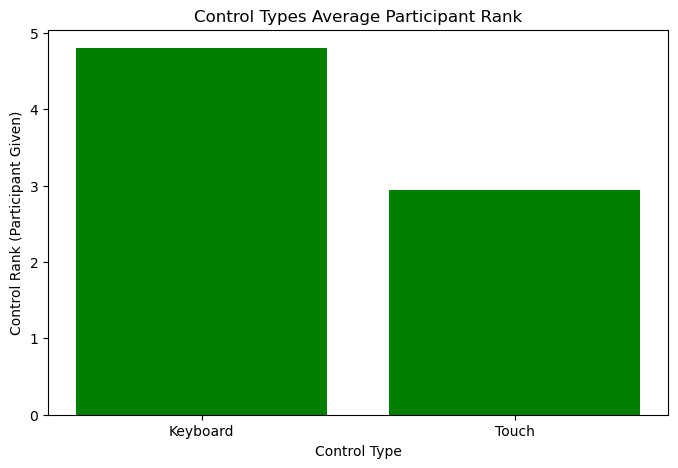

In [9]:
bar_data = {'Keyboard':key_rank_avg, 'Touch':touch_rank_avg}
control = list(bar_data.keys())
control_avg = list(bar_data.values())
  
fig = plt.figure(figsize = (8, 5))

plt.bar(control, control_avg, color ='green', width = 0.8)
 
plt.xlabel("Control Type")
plt.ylabel("Control Rank (Participant Given)")
plt.title("Control Types Average Participant Rank")
plt.show()

Code for calculating Standard Deviation/Mean/Etc
Create graphs for results.